In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [118]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [119]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [120]:
df.info() #finding the null value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [121]:
df['Genre'].head() #the space in genre is also we have to remove further

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [122]:
df.duplicated().sum() #finding the duplicate movie

0

In [123]:
df.describe() #statistics

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


Exploration summary

* we have a data consisting of 9827 roes and 9 columns.
* our dataset looks a bit tidy with no NaNs nor duplicated values.
* Release_Data column needs to be casted into time and to extract only the values.
* Overview, Original_Language and Poster-url wouldn't be so useful during analysis, so we'll drop them.
* there is a noticable outliers in Popularity column.
* Vote_Average better be categorised for proper analysis.
* Genre column has comma saperated values and white spaces that needs to be handled and casted into category.Exploration Summary.

In [125]:
##cleaning the data

df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [126]:
##only show year
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [127]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the column


In [129]:
cols = ['Overview','Original_Language','Poster_Url']

In [130]:
df.drop(cols,axis=1,inplace=True)

In [131]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**categorizing Vote_Average column
we would cut the Vote_Average values and make 4 categories : poopular average below_avg not_popular to describe it more using categorize_col() function provided above.


In [133]:
def catigorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df
    

In [134]:
labels=['not_popular','below_avg','average','popular']
catigorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [135]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [136]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [137]:
df.dropna(inplace=True)

In [138]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [139]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


* Seperating Genre
  

In [141]:
df['Genre']=df['Genre'].str.split('. ')
df=df.explode('Genre').reset_index(drop=True)
df.head(6)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Scienc
3,2021,Spider-Man: No Way Home,5083.954,8940,popular,Fiction
4,2022,The Batman,3827.658,1151,popular,Crime
5,2022,The Batman,3827.658,1151,popular,Mystery


In [142]:
#casting column into cateogy

df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction',
                  'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Romance',
                  'Scienc', 'T', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27021 entries, 0 to 27020
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  27021 non-null  int32   
 1   Title         27021 non-null  object  
 2   Popularity    27021 non-null  float64 
 3   Vote_Count    27021 non-null  int64   
 4   Vote_Average  27021 non-null  category
 5   Genre         27021 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 792.7+ KB


In [144]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             21
dtype: int64

In [145]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Scienc
3,2021,Spider-Man: No Way Home,5083.954,8940,popular,Fiction
4,2022,The Batman,3827.658,1151,popular,Crime


Data Visualization



In [147]:
sns.set_style('whitegrid')

In [148]:
#What is the most frequent genre of movies relesed on Netflix?

df['Genre'].describe()

count     27021
unique       21
top       Drama
freq       3715
Name: Genre, dtype: object

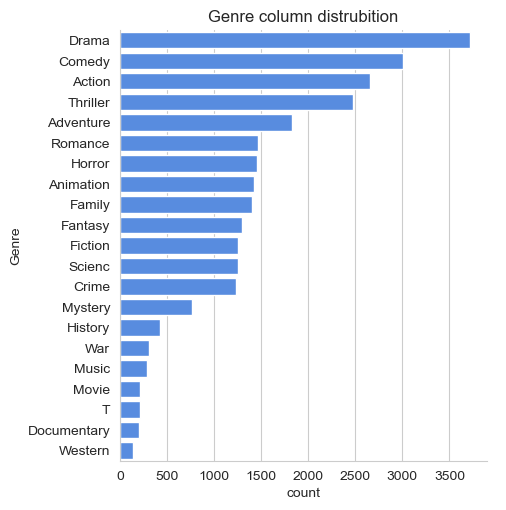

In [149]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='#4287f5')
plt.title("Genre column distrubition")
plt.show()

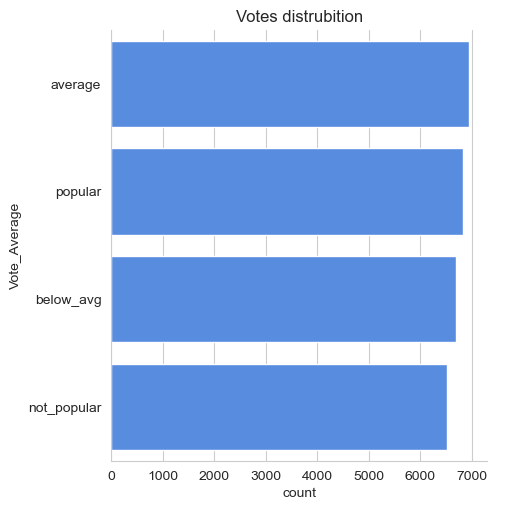

In [150]:
# Which has highest votes in vote avg column ?

sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='#4287f5')
plt.title('Votes distrubition')
plt.show()

In [152]:
# What movie got the highest popularity ? what's its genre?

df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [158]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Scienc
3,2021,Spider-Man: No Way Home,5083.954,8940,popular,Fiction


In [160]:
# What movie got the lowest popularity ?

df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
27014,2021,The United States vs. Billie Holiday,13.354,152,average,Music
27015,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
27016,2021,The United States vs. Billie Holiday,13.354,152,average,History
27017,1984,Threads,13.354,186,popular,War
27018,1984,Threads,13.354,186,popular,Drama
27019,1984,Threads,13.354,186,popular,Scienc
27020,1984,Threads,13.354,186,popular,Fiction


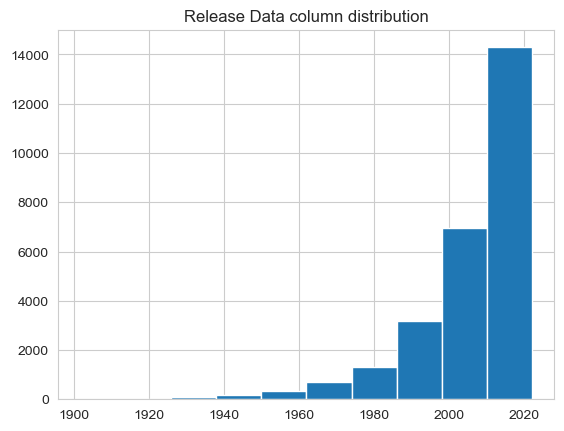

In [162]:
# Which year has the most filmmed movies ?

df['Release_Date'].hist()
plt.title('Release Data column distribution')
plt.show()